# Lista 3 (10 pkt.)

In [66]:
import numpy as np
from PIL import Image
import sys

Na tej liście zaimplementujemy algorytm DES (Data Encryption Standard)

## Zadanie 1 (1 pkt)

Napisz funkcję $\textit{bin2dec}$ przyjmującą string będący liczbą zapisaną w postaci binarnej a zwracającą liczbę zapisaną w postaci dziesiętnej oraz funkcję $\textit{dec2bin()}$ przyjmującą liczbę typu int a zwracającą string będący liczbą zapisaną w postaci binarnej, funkcja ta ma przyjmować również drugi argument 'pad', który będzie określał do jakiej długości binarna postać będzie uzupełniana zerami z przodu.

In [67]:
def bin2dec(bin_str):
    result=0
    for i in range(len(bin_str)):
        result+=2**(len(bin_str)-i-1) * int(bin_str[i])
    return result

In [68]:
print(bin2dec('0')==0)
print(bin2dec('10')==2)
print(bin2dec('111')==7)
print(bin2dec('1001')==9)
print(bin2dec('0001')==1)

True
True
True
True
True


In [69]:
def dec2bin(dec_str,pad):
    padding = '{0:0' + str(pad) + 'b}'
    bin_string = padding.format(dec_str)
    #bin_string = ""
    #while dec_str > 0:
    #    bin_string=str(dec_str%2) + bin_string
    #    dec_str=int(dec_str/2)
    #if len(bin_string) < pad:
    #    bin_string="0"*(pad-len(bin_string)) + bin_string
    return bin_string

In [70]:
print(dec2bin(0,1)=='0')
print(dec2bin(2,2)=='10')
print(dec2bin(7,4)=='0111')
print(dec2bin(9,4)=='1001')
print(dec2bin(1,4)=='0001')

True
True
True
True
True


Napisz funkcję $\textit{shift_left(tab,n)}$, która przyjmuje tablice $\textit{tab}$ oraz liczbę całkowitą $\textit{n}$ i zwraca tablicę, która jest pierwotną tablicą z elementami przesuniętymi w lewo o $\textit{n}$.

In [71]:
def shift_left(tab,n):
    n = n%len(tab)
    return tab[n:] + tab[:n]

In [72]:
print(shift_left([1,2,3,4],2)==[3,4,1,2])
print(shift_left([1,2,3,4],3)==[4,1,2,3])
print(shift_left([1,2,3,4,5,6],2)==[3,4,5,6,1,2])

True
True
True


## Zadanie 2 (1 pkt)

Napisz funkcję $\textit{permute()}$, która przyjmuje string $\textit{k}$ i dokonuje permutacji znaków zgodnie z tablicą $\textit{perm}$, w tym równeż tzw. permutację rozszerzoną, która duplikuje niektóre elementy oraz taką, która pomija niektóre elementy, patrz przykłady w testach:

In [73]:
def permute(k,perm):
    res=[k[i] for i in perm]
    return ''.join(res)

In [74]:
print(permute('abcd',[1,0,2,3])=='bacd')
print(permute('abcd',[3,2,1,0])=='dcba')
print(permute('abcd',[0,1,2,3,0])=='abcda')
print(permute('1100',[0,1,3,2,0,3])=='110010')
print(permute('1100',[0,2,1])=='101')

True
True
True
True
True


Napisz funkcję $\textit{xor()}$, która przyjmuje dwa równej długości stringi $\textit{bin_str1}$ i $\textit{bin_str2}$ będące liczbami zapisanymi w postaci binarnej i dokonuje operacji alternatywy wykluczającej (1+0=0,1+1=0,0+0=0) a następnie zwraca string z wynikową liczbą w postaci binarnej.

In [75]:
def xor(bin_str1,bin_str2):
    length = len(bin_str1)
    int1 = bin2dec(bin_str1)
    int2 = bin2dec(bin_str2)
    return dec2bin(int1^int2,length)

In [76]:
print(xor('0','0')=='0')
print(xor('1','1')=='0')
print(xor('01','11')=='10')
print(xor('1101','1111')=='0010')
print(xor('11111','11111')=='00000')

True
True
True
True
True


## Zadanie 3 (2 pkt)

Napisz funkcję $\textit{key_schedule()}$, która przyjmuje string $\textit{key}$ będący kluczem zapisanym w postaci binarnej o długości 64 bitów i zwraca listę zawierającą 16 wygenerowanych podkluczy w postaci stringów bitów. Generację podkluczy przeprowadź korzystając z poniższego schematu.

1. Z klucza 64 bitowego uzyskaj klucz 56 bitowy poprzez permutację zadaną przez $\textit{PC1}$, tzn. użyj funkcji $\textit{permute}$.
2. Podziel klucz na pół, uzyskując dwa, lewy i prawy, każdy po 28 bitów.
3. Wygeneruj 16 podkluczy wykonując następujące operacje: przesuń lewy i prawy klucz za pomocą funkcji $\textit{shift_left}$ o wartość wynikającą z tabeli $\textit{shift_table}$ (tzn. przy genercji i-tego podklucza przesuń o wartośc z i-tej pozycji w tabeli), połącz lewy i prawy klucz uzyskując klucz 56 bitowy, uzyskaj z niego klucz 48 bitowy za pomocą funkkcji $\textit{permute}$ i $\textit{PC2}$, w ten sposób dostaniesz jeden z 16 podkluczy.

<img src="DES_key_shedule.png" alt="drawing" width="400"/>

In [77]:
PC1 = [56, 48, 40, 32, 24, 16,  8,  0, 57, 49, 41, 33, 25, 17,  9,  1, 58,
       50, 42, 34, 26, 18, 10,  2, 59, 51, 43, 35, 62, 54, 46, 38, 30, 22,
       14,  6, 61, 53, 45, 37, 29, 21, 13,  5, 60, 52, 44, 36, 28, 20, 12,
        4, 27, 19, 11,  3] 

shift_table = [1, 1, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 1 ] 

PC2=[13, 16, 10, 23,  0,  4,  2, 27, 14,  5, 20,  9, 22, 18, 11,  3,
     25, 7, 15,  6, 26, 19, 12,  1, 40, 51, 30, 36, 46, 54, 29, 39,
     50, 44, 32, 47, 43, 48, 38, 55, 33, 52, 45, 41, 49, 35, 28, 31]

In [78]:
def key_schedule(key):
    permuted_key = permute(key,PC1)
    left_key = permuted_key[:int(len(permuted_key)/2)]
    right_key = permuted_key[int(len(permuted_key)/2):]
    keys=[]
    for shift in shift_table:
        left_key = shift_left(left_key,shift)
        right_key = shift_left(right_key,shift)
        new_key = left_key+right_key
        keys.append(permute(new_key,PC2))
    return keys

In [79]:
print(key_schedule('1010101010111011000010010001100000100111001101101100110011011101')==
      ['000110010100110011010000011100101101111010001100',
       '010001010110100001011000000110101011110011001110',
       '000001101110110110100100101011001111010110110101',
       '110110100010110100000011001010110110111011100011',
       '011010011010011000101001111111101100100100010011',
       '110000011001010010001110100001110100011101011110',
       '011100001000101011010010110111011011001111000000',
       '001101001111100000100010111100001100011001101101',
       '100001001011101101000100011100111101110011001100',
       '000000100111011001010111000010001011010110111111',
       '011011010101010101100000101011110111110010100101',
       '110000101100000111101001011010100100101111110011',
       '100110011100001100010011100101111100100100011111',
       '001001010001101110001011110001110001011111010000',
       '001100110011000011000101110110011010001101101101',
       '000110000001110001011101011101011100011001101101'])

True


## Zadanie 4 (2 pkt)

W tym zadaniu zaimplementujemy sieć Feistela, która stanowi trzon wielu algorytmów kryptograficzynch, w tym również DESa.

Napisz funkcję $\textit{Feistel(message, subkeys, F)}$, która przyjmuje string $\textit{message}$ będący wiadomoscią zapisaną w postaci binarnej o długości 64 bitów, listę $\textit{subkeys}$ zawierającą 16 podkluczy w postaci stringów bitów a takze funkcję $\textit{F}$. W kolejnym zadaniu zaimplementujemy funkcję $\textit{F}$, która jest używana w szyfrze DES, tutaj implementujemy sieć Feistela, w której może być użyta dowolna funkcja $\textit{F}$ (patrz testy). Funkcja $\textit{Feistel}$ ma zwracać string bitów będący zaszyfrowaną wiadomością. Skorzystaj z poniższych wskazówek i diagramu.
1. Podziel wiadomość na lewą i prawą część, każda po 32 bity.
2. Prawą część użyj jako argument funkcji $\textit{F}$, drugim argumentem funkcji $\textit{F}$ będzie podklucz odpowiedni dla danej rundy.
3. Wynik funkcji $\textit{F}$ dodaj do lewej części za pomocą operacji $\textit{XOR}$.
4. Zamień miejscami lewą i prawą część.
5. Powtórz punkty 1,2,3,4 16-krotnie, ale w ostatniej rundzie pomiń punkt 4..

<img src="Feistel.png" alt="drawing" width="400"/>

In [80]:
def Feistel(message, subkeys, F):
    left_mess = message[:int(len(message)/2)]
    right_mess = message[int(len(message)/2):]
    rounds=len(subkeys)
    for i in range(rounds):
        f_result = F(right_mess,subkeys[i])
        left_mess = xor(f_result, left_mess)
        if(i==rounds-1):
            break
        right_mess, left_mess = left_mess, right_mess
    return left_mess+right_mess

In [81]:
message = '0001001000110100010101101010101111001101000100110010010100110110'

subkeys = ['000110010100110011010000011100101101111010001100',
       '010001010110100001011000000110101011110011001110',
       '000001101110110110100100101011001111010110110101',
       '110110100010110100000011001010110110111011100011',
       '011010011010011000101001111111101100100100010011',
       '110000011001010010001110100001110100011101011110',
       '011100001000101011010010110111011011001111000000',
       '001101001111100000100010111100001100011001101101',
       '100001001011101101000100011100111101110011001100',
       '000000100111011001010111000010001011010110111111',
       '011011010101010101100000101011110111110010100101',
       '110000101100000111101001011010100100101111110011',
       '100110011100001100010011100101111100100100011111',
       '001001010001101110001011110001110001011111010000',
       '001100110011000011000101110110011010001101101101',
       '000110000001110001011101011101011100011001101101']

#Przykładowe funkcje do testowania, w przypadku DESa, będzie to funkcja z zdania 4.
def F1(right,subkey):
    return xor(right,subkey[:32])

def F2(right,subkey):
    return 32*'1'

print(Feistel(message,subkeys,F1)=='0101110101010110001010010001100000101111010110001101111110100001')
print(Feistel(message,subkeys,F2)=='1100110100010011001001010011011000010010001101000101011010101011')

True
True


Zaletą sieci Feistela jest to, że aby odszyfrować zaszyfrowany nią ciąg bitów wystarczy użyć jej jeszcze raz z kluczami podanymi w odwrotnej kolejności, niezaleznie od tego czy funkcja F jest odwracalna czy też nie, poniższe testy sprawdzają te własność:

In [82]:
print(Feistel(Feistel(message,subkeys,F1),subkeys[::-1],F1)==message)
print(Feistel(Feistel(message,subkeys,F2),subkeys[::-1],F2)==message)

True
True


## Zadanie 5 (2 pkt)

W tym zadaniu zaimplementujemy funkcję $\textit{F}$, która jest funkcją użytą w sieci Feistela w przypadku DESa.

Funkcja ta przyjmuje jako argument string zawierający 32 bity oraz podklucz bedący stringiem z 48 bitami, zwraca natomiast string z 32 bitami. Operacje, które wykonuje są następujące:

1. Ciąg 32 bitów jest poddawany permutacji rozszerzonej $\textit{E}$, która zwraca ciąg 48 bitów.
2. Do tego ciągu jest dodawany klucz za pomocą operacji XOR.
3. Następnie ciąg 48 bitów dzielimy na 8 grup po 6 bitów, które trafiają do tzw. S-Boxów. Zmienna $\textit{SBox}$ zwiera listę 8 SBoxów, każdego używamy do innej grupy bitów. SBox jest macierzą z której odczytujemy ciąg 4 bitów odpowiadający wejściowym 6 bitom. Robimy to w następujący sposób. Z grupu 6 bitów bierzemy pierwszy i ostatni (jeżeli naszymi 6 bitami są '101011' to bierzemy '11') i zamieniamy na liczbę dziesiątną (w naszym przykłądzie 3) ta liczba oznacza numer wiersza w macierzy, następnie bierzemy pozostałe, środkowe, 4 bity ('0101') i zamieniamy na liczbę dziesiętną (5), określa ona nam numer kolumny. W ten sposób znaleziony element macierzy zamieniamy na liczbę zapisaną za pomocą 4 bitów. Wten sposób każdy z 8 SBoxów zamienia grupę 6 bitów na grupę 4 bitów.
4. Powstałe grupy łaczymy w jeden ciąg 32 bitowy.
5. Poddajemy ten ciąg permutacji $\textit{P}$

<!--- <img src="F.png" alt="drawing" width="400" align="left"/>
-->

In [83]:
E = [31,  0,  1,  2,  3,  4,  3,  4,  5,  6,  7,  8,  7,  8,  9, 10, 11,
       12, 11, 12, 13, 14, 15, 16, 15, 16, 17, 18, 19, 20, 19, 20, 21, 22,
       23, 24, 23, 24, 25, 26, 27, 28, 27, 28, 29, 30, 31,  0]

SBox = [[[14, 4, 13, 1, 2, 15, 11, 8, 3, 10, 6, 12, 5, 9, 0, 7], 
        [ 0, 15, 7, 4, 14, 2, 13, 1, 10, 6, 12, 11, 9, 5, 3, 8], 
        [ 4, 1, 14, 8, 13, 6, 2, 11, 15, 12, 9, 7, 3, 10, 5, 0], 
        [15, 12, 8, 2, 4, 9, 1, 7, 5, 11, 3, 14, 10, 0, 6, 13 ]], 
        
        [[15, 1, 8, 14, 6, 11, 3, 4, 9, 7, 2, 13, 12, 0, 5, 10], 
        [3, 13, 4, 7, 15, 2, 8, 14, 12, 0, 1, 10, 6, 9, 11, 5], 
        [0, 14, 7, 11, 10, 4, 13, 1, 5, 8, 12, 6, 9, 3, 2, 15], 
        [13, 8, 10, 1, 3, 15, 4, 2, 11, 6, 7, 12, 0, 5, 14, 9 ]], 

        [ [10, 0, 9, 14, 6, 3, 15, 5, 1, 13, 12, 7, 11, 4, 2, 8], 
        [13, 7, 0, 9, 3, 4, 6, 10, 2, 8, 5, 14, 12, 11, 15, 1], 
        [13, 6, 4, 9, 8, 15, 3, 0, 11, 1, 2, 12, 5, 10, 14, 7], 
        [1, 10, 13, 0, 6, 9, 8, 7, 4, 15, 14, 3, 11, 5, 2, 12 ]], 

        [ [7, 13, 14, 3, 0, 6, 9, 10, 1, 2, 8, 5, 11, 12, 4, 15], 
         [13, 8, 11, 5, 6, 15, 0, 3, 4, 7, 2, 12, 1, 10, 14, 9], 
         [10, 6, 9, 0, 12, 11, 7, 13, 15, 1, 3, 14, 5, 2, 8, 4], 
         [3, 15, 0, 6, 10, 1, 13, 8, 9, 4, 5, 11, 12, 7, 2, 14] ], 

        [ [2, 12, 4, 1, 7, 10, 11, 6, 8, 5, 3, 15, 13, 0, 14, 9], 
        [14, 11, 2, 12, 4, 7, 13, 1, 5, 0, 15, 10, 3, 9, 8, 6], 
        [4, 2, 1, 11, 10, 13, 7, 8, 15, 9, 12, 5, 6, 3, 0, 14], 
        [11, 8, 12, 7, 1, 14, 2, 13, 6, 15, 0, 9, 10, 4, 5, 3 ]], 
        
        [ [12, 1, 10, 15, 9, 2, 6, 8, 0, 13, 3, 4, 14, 7, 5, 11], 
        [10, 15, 4, 2, 7, 12, 9, 5, 6, 1, 13, 14, 0, 11, 3, 8], 
         [9, 14, 15, 5, 2, 8, 12, 3, 7, 0, 4, 10, 1, 13, 11, 6], 
         [4, 3, 2, 12, 9, 5, 15, 10, 11, 14, 1, 7, 6, 0, 8, 13] ],
        
        [ [4, 11, 2, 14, 15, 0, 8, 13, 3, 12, 9, 7, 5, 10, 6, 1], 
        [13, 0, 11, 7, 4, 9, 1, 10, 14, 3, 5, 12, 2, 15, 8, 6], 
        [1, 4, 11, 13, 12, 3, 7, 14, 10, 15, 6, 8, 0, 5, 9, 2], 
        [6, 11, 13, 8, 1, 4, 10, 7, 9, 5, 0, 15, 14, 2, 3, 12] ], 

        [ [13, 2, 8, 4, 6, 15, 11, 1, 10, 9, 3, 14, 5, 0, 12, 7], 
         [1, 15, 13, 8, 10, 3, 7, 4, 12, 5, 6, 11, 0, 14, 9, 2], 
         [7, 11, 4, 1, 9, 12, 14, 2, 0, 6, 10, 13, 15, 3, 5, 8], 
         [2, 1, 14, 7, 4, 10, 8, 13, 15, 12, 9, 0, 3, 5, 6, 11] ] ] 

P = [ 15,  6, 19, 20, 28, 11, 27, 16,  0, 14, 22, 25,  4, 17, 30,  9,  1,
        7, 23, 13, 31, 26,  2,  8, 18, 12, 29,  5, 21, 10,  3, 24] 

In [84]:
def F(right, subkey):
    permutation_res = permute(right, E)
    xor_res = xor(permutation_res, subkey)
    f_res=''
    for i in range(8):
        sbox_input = xor_res[6*i:6*(i+1)]
        row = bin2dec(sbox_input[0] + sbox_input[-1])
        col = bin2dec(sbox_input[1:-1])
        f_res+=dec2bin(SBox[i][row][col],4)
    f_res=permute(f_res,P)
    return f_res

In [85]:
print(F('11001101000100110010010100110110','000110010100110011010000011100101101111010001100')
      =='00010000110101100001010011011100')
print(F('00010010001101000101011010101011','010001010110100001011000000110101011110011001110')
      =='10110011111110000011101011101011')

True
True


## Zadanie 6 (1 pkt)

Wykorzystujac funkcje  zpoprzednich zadań zaimplementuj szyfr DES. Napisz funkcję $\textit{DES(message, subkeys)}$, która jako argumenty przyjmuje string z 64 bitami, oraz listę 16 podkluczy 48 bitowych a zwraca string z 64 bitami po zaszyfrowaniu i wykonuje nastepujące kroki:

1. Wykonaj permutację początkową $\textit{IP}$
2. Wykonaj sieć Feistela z funkcją $\textit{F}$ z pooprzedniego zadania.
3. Wykonaj permutację końcową $\textit{FP}$

In [86]:
IP = [57, 49, 41, 33, 25, 17,  9,  1, 59, 51, 43, 35, 27, 19, 11,  3, 61,
       53, 45, 37, 29, 21, 13,  5, 63, 55, 47, 39, 31, 23, 15,  7, 56, 48,
       40, 32, 24, 16,  8,  0, 58, 50, 42, 34, 26, 18, 10,  2, 60, 52, 44,
       36, 28, 20, 12,  4, 62, 54, 46, 38, 30, 22, 14,  6] 

FP = [39,  7, 47, 15, 55, 23, 63, 31, 38,  6, 46, 14, 54, 22, 62, 30, 37,
        5, 45, 13, 53, 21, 61, 29, 36,  4, 44, 12, 52, 20, 60, 28, 35,  3,
       43, 11, 51, 19, 59, 27, 34,  2, 42, 10, 50, 18, 58, 26, 33,  1, 41,
        9, 49, 17, 57, 25, 32,  0, 40,  8, 48, 16, 56, 24]

In [87]:
def DES(message, subkeys):
    res = permute(message,IP)
    res = Feistel(res, subkeys,F)
    res = permute(res,FP)
    return res

In [88]:
message = '0001001000110100010101101010101111001101000100110010010100110110'
key='1010101010111011000010010001100000100111001101101100110011011101'

subkeys=key_schedule(key)

print(DES(message,subkeys)=='1100000010110111101010001101000001011111001110101000001010011100')

True


Deszyfracji dokonujemy tym samym algorytmem co szyfracji, czyli funkcją $\textit{DES}$ ale musimy odwrócić kolejność w liście podkluczy, wobec tego powinno zachodzić:

In [89]:
print(DES(DES(message,subkeys),subkeys[::-1])==message)

True


## Zadanie 7 (1 pkt)

Wczytaj obrazek img_enc.png za pomocą poniższego kodu:

In [49]:
img_enc=Image.open('img_enc.png')
arr=np.array(img_enc).ravel()
arr_bin=[dec2bin(d,pad='8') for d in arr]
bits=''.join(arr_bin)

Uzyskany ciąg bitów $\textit{bits}$ podziel na bloki 64-bitowe i każdy z nich odszyfruj wiedząc, że został zaszyfrowany DES-em z kluczem:

In [ ]:
key = '1010101010111011000010010001100000100111001101101100110011011101'

Pamiętaj, że deszyfracji dokomujemy tym samym algorytmem co szyfracji, czyli funkcją $\textit{DES}$ ale musimy odwrócić kolejność w liście podkluczy.

In [42]:
def split_img(img, len_of_blocks):
    result = []
    blocks = int(len(img)/len_of_blocks)
    for i in range(blocks):
        result.append(img[i*len_of_blocks:(i+1)*len_of_blocks])
    return result

In [64]:
subkeys = key_schedule(key)
img_t = ''
blocks = split_img(bits, 64)

toolbar_width = 10
i=0
print(len(blocks))
for block in blocks:
    subkey = subkeys[::-1]
    img_t += DES(block,subkey)
    i+=1
    if(i%81==0):
        sys.stdout.write("Decoding: {}%\r".format(round(i/len(blocks)*100,2)))
        sys.stdout.flush()

81000


Uzyskane ciagi bitów połącz w jeden ciąg a następnie korzystając z poniższego kodu zamień w obrazek:

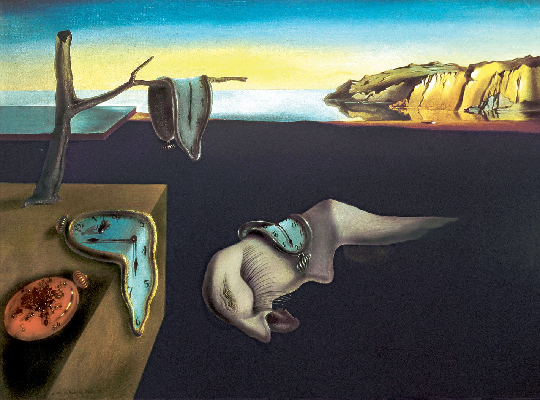

In [92]:
#img_t to ciąg stringów powstałych z odszyfrowania DES-em
#split_img(img_t,8) dzieli img_t na bloki 8 bitowe, możesz zaimplementować tę funkcję lub rozwiązać to inaczej
img=np.array([bin2dec(b) for b in split_img(img_t,8)]).reshape(np.array(img_enc).shape)
dec_img = Image.fromarray(np.uint8(np.array(img)))
dec_img.save("dec_img.jpg")
dec_img

Jeśli wszystko pójdzie dobrze powinien pokazać się obrazek. Co to za obraz?

In [ ]:
Trwałość pamięci - Salvador Dalí